## Original Astronomy Dataset #
### Stars, Galaxies and Quasars ##
https://www.sdss.org/dr17/
http://skyserver.sdss.org/dr17/SearchTools/sql

In [1]:
# use solo cpu
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5626663358595659212
xla_global_id: -1
]


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
# Load Dataset
df=pd.read_csv('clean_Skyserver_SQL1_5_2022 11_26_53 PM.csv', low_memory=False)
df.head(2)

,objid,ra,dec,u,g,r,i,z,redshift,class
0,1237678598097404025,0.044032,0.035457,0.393903,0.352869,0.337332,0.331551,0.330089,0.000495,STAR
1,1237678598076366970,0.910465,0.030273,0.387076,0.348962,0.337407,0.333596,0.332157,0.000466,STAR


In [8]:
df.drop(['objid'], axis=1, inplace =True)
df.head(2)

,ra,dec,u,g,r,i,z,redshift,class
0,0.044032,0.035457,0.393903,0.352869,0.337332,0.331551,0.330089,0.000495,STAR
1,0.910465,0.030273,0.387076,0.348962,0.337407,0.333596,0.332157,0.000466,STAR


In [9]:
# label encoder
label_class = LabelEncoder()
df['label_class'] = label_class.fit_transform(df['class'])
df.head(3)

,ra,dec,u,g,r,i,z,redshift,class,label_class
0,0.044032,0.035457,0.393903,0.352869,0.337332,0.331551,0.330089,0.000495,STAR,2
1,0.910465,0.030273,0.387076,0.348962,0.337407,0.333596,0.332157,0.000466,STAR,2
2,0.030819,0.132237,0.447280,0.406822,0.392707,0.386791,0.384882,0.000450,STAR,2


In [10]:
# train_test_split
X = df.drop(['class', 'label_class'], axis=1, inplace =False).values
y = df['label_class'].values

In [11]:
# label to categorical tensorflow
y = to_categorical(y)

In [12]:
y[0]

array([0., 0., 1.], dtype=float32)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [15]:
print(X_train.shape)
print(y_train.shape)

(64000, 8)
(64000, 3)


In [16]:
# make the model
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(3,activation='softmax'))

In [17]:
# compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# early_stop
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [19]:
# save best model
modelCheckpoint = ModelCheckpoint('astronomy_model_NN.h5', save_best_only = True) 

In [20]:
history = model.fit(X_train, y_train, epochs=30, batch_size=512, validation_data=(X_val,y_val),
                   verbose=1, callbacks=[early_stop, modelCheckpoint])

Epoch 1/30
125/125 [==============================] - 1s 6ms/step - loss: 0.9386 - accuracy: 0.5048 - val_loss: 0.8024 - val_accuracy: 0.5945
Epoch 2/30
125/125 [==============================] - 0s 3ms/step - loss: 0.7354 - accuracy: 0.6323 - val_loss: 0.6439 - val_accuracy: 0.6727
Epoch 3/30
125/125 [==============================] - 0s 3ms/step - loss: 0.6280 - accuracy: 0.6948 - val_loss: 0.5611 - val_accuracy: 0.7662
Epoch 4/30
125/125 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.7463 - val_loss: 0.4857 - val_accuracy: 0.7989
Epoch 5/30
125/125 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7950 - val_loss: 0.4093 - val_accuracy: 0.8609
Epoch 6/30
125/125 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.8300 - val_loss: 0.3500 - val_accuracy: 0.8803
Epoch 7/30
125/125 [==============================] - 0s 3ms/step - loss: 0.3673 - accuracy: 0.8572 - val_loss: 0.3203 - val_accuracy: 0.8854
Epoch 

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

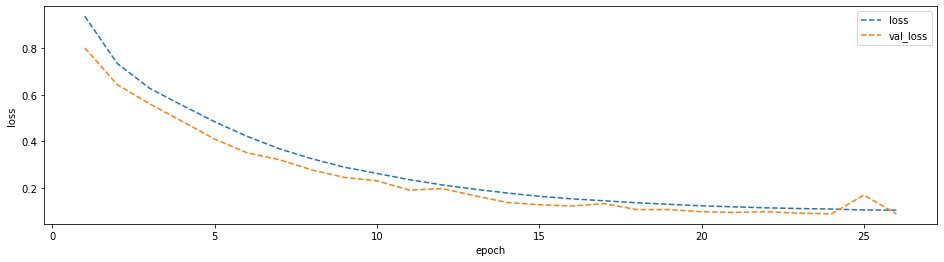

In [23]:
fig = plt.figure(figsize=(16,4))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, '--',label='loss')
plt.plot(epoch,val_loss_values, '--',label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

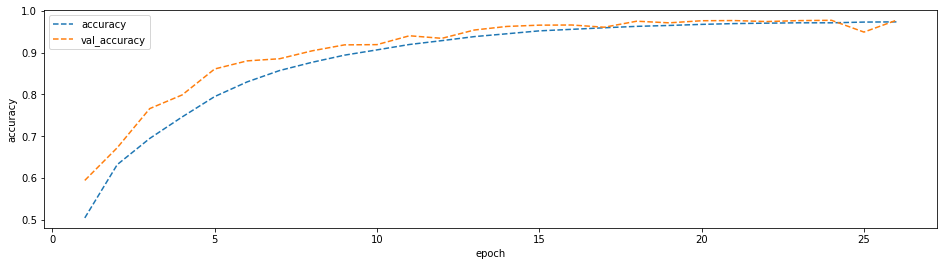

In [24]:
fig = plt.figure(figsize=(16,4))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,accuracy_values, '--',label='accuracy')
plt.plot(epoch,val_accuracy_values, '--',label='val_accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [25]:
model.evaluate(X_test,y_test)

625/625 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9768


[0.08725867420434952, 0.9767500162124634]

In [28]:
# load model
load_model = tf.keras.models.load_model('astronomy_model_NN.h5')
load_model

In [29]:
predictions = load_model.predict(X_test)

In [30]:
predictions[0]

array([9.8570883e-01, 1.4281514e-02, 9.6694166e-06], dtype=float32)